# Analysis of queue throughput measurements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("measurements.csv")

In [3]:
# placeholder for filter

In [4]:
"""Plot profile from latest run."""


def plot_profile(profile):
    df1 = df.loc[df["profile"] == profile]
    # filter latest
    latest = df1["timestamp"].max()
    df1 = df1.loc[df["timestamp"] == latest]
    if df1.empty:
        return

    df2: pd.DataFrame = df1.pivot(
        index="items", columns="storage_engine", values="throughput"
    )
    timestamp = pd.to_datetime(latest).strftime("%Y-%b-%d %H:%M")
    fig, ax = plt.subplots()
    df2.plot(
        title=f"Throughput with profile {profile} ({timestamp})", style=".-", ax=ax
    )
    ax.set_ylim(bottom=0)
    return ax

<Axes: title={'center': 'Throughput with profile minimal (2023-Jun-01 23:54)'}, xlabel='items'>

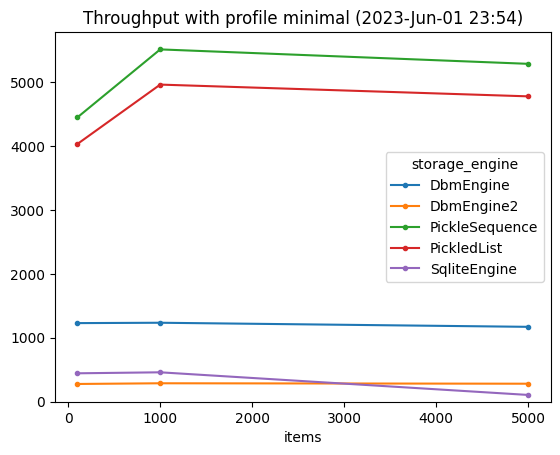

In [5]:
plot_profile("minimal")

In [6]:
plot_profile("medium")

In [7]:
plot_profile("heavy")

In [8]:
plot_profile("producers only")

In [9]:
plot_profile("consumers only")